In [141]:
import numpy as np
from scipy.interpolate import BSpline
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [142]:
a, b = 0, 1
f = lambda x: -3 * np.exp(-x)
u_exact = lambda x: (x + 1) * np.exp(-x)

# k10n10, k12n8
k = 10
n_intervals = 10
n_basis = n_intervals + k

In [143]:
internal_knots = np.linspace(a, b, n_basis - k + 1)
t = np.concatenate((np.full(k, a), internal_knots, np.full(k, b)))

m = n_basis - 2
x_coll = np.linspace(a + 1e-6, b - 1e-6, m)

A = np.zeros((n_basis, n_basis))
rhs = np.zeros(n_basis)

In [144]:
for i in range(n_basis):
    coeff = np.zeros(n_basis)
    coeff[i] = 1
    B = BSpline(t, coeff, k)
    B_d = B.derivative(nu=1)
    B_dd = B.derivative(nu=2)

    for j, xj in enumerate(x_coll):
        A[j, i] = B_dd(xj) - B_d(xj) - 2 * B(xj)

for i in range(n_basis):
    coeff = np.zeros(n_basis)
    coeff[i] = 1
    B = BSpline(t, coeff, k)
    B_d = B.derivative(nu=1)
    A[m, i] = B_d(a)

for i in range(n_basis):
    coeff = np.zeros(n_basis)
    coeff[i] = 1
    B = BSpline(t, coeff, k)
    B_d = B.derivative(nu=1)
    A[m + 1, i] = B(b) + 2 * B_d(b)

In [145]:
rhs[:m] = f(x_coll)
rhs[m] = 0
rhs[m + 1] = 0

c = solve(A, rhs)

x_vals = np.linspace(a, b, 500)
y_vals = np.zeros_like(x_vals)

for i in range(n_basis):
    coeff = np.zeros(n_basis)
    coeff[i] = 1
    B = BSpline(t, coeff, k)
    y_vals += c[i] * B(x_vals)

u_exact_vals = u_exact(x_vals)

In [146]:
print(f"max: {np.max(np.abs(y_vals - u_exact_vals))}\navg: {np.mean(np.abs(y_vals - u_exact_vals))}")

max: 1.8662849043948881e-13
avg: 9.517209242915215e-14


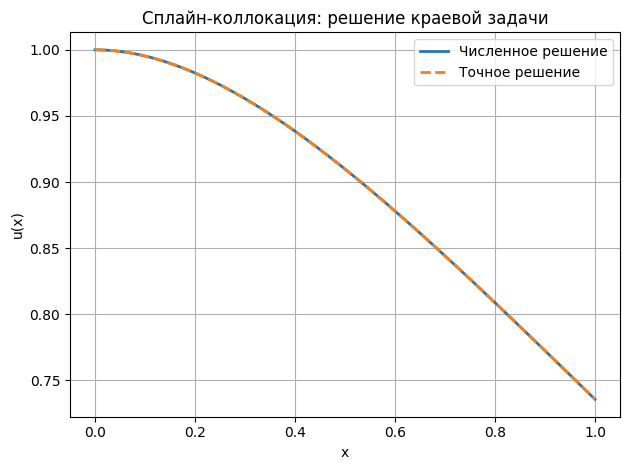

In [147]:
plt.plot(x_vals, y_vals, label='Численное решение', linewidth=2)
plt.plot(x_vals, u_exact_vals, '--', label='Точное решение', linewidth=2)
plt.title('Сплайн-коллокация: решение краевой задачи')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()